# Saturn's Current Sheet Warping - Quick Looks

## Developed by A. R. Azari - 10/29/2018

This notebook demonstrates for certain input parameters the expected warping of Saturn's current sheet based off of previously published results (Arridge et al. 2008). Additional iterations of this notebook will improve upon the current understanding of the physical system to develop more up-to-date exploratory information.  

This was developed for quick look evaluations for active years of the Cassini mission to Saturn's magnetosphere. This illustration should not be used in-lieu of data analysis, more advanced magnetic field models, or calculations of the current sheet location for scientific investigations.  

If referencing the analytical model in scientific communities please refer to the original published source material details, limtitations within this model, and error analysis at:


    Arridge, C. S., K. K. Khurana, C. T. Russell, D. J. Southwood, N. Achilleos, M. K. Dougherty, A. J. Coates, and H. K. Leinweber (2008), Warping of Saturn’s magnetospheric and magnetotail current sheets, J. Geophys. Res., 
    113, A08217, doi:10.1029/2007JA012963.
    

Bonus! The notebook demonstrates additional functionality between pandas and datetime objects, LaTeX and Jupyter. 


In [59]:
#importing required python packages

import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import datetime as dt            #this enables datetime object handling
import math                      #for tangents
    
###########TENABLES MATPLOTLIB PLOTTING
import matplotlib.pyplot as plt  #for plotting of datasets

#setting up Jupyter environment so plots 
#will be placed in the notebook 
%matplotlib inline

## Step 1: As described calculating the solar latitude angle over the course of the Cassini Mission in Arridge et al. (2008) Appendix A

The following equation is described in Arridge et al. (2008) as an alternative to using the SPICE system to calculate the solar latitude angle. Please note - the equations below are written in LaTeX. They will render if you download the Jupyter notebook, but might not render on the Github hosting site. 

$$\theta_{SUN} = -1.371^{\circ} - 25.69^{\circ}cos(2.816+0.213499t_{YR}) + 1.389^{\circ}cos(5.4786 + 0.426998t_{YR})$$

I calculate this using Python datetimes and Pandas notebooks for illustrative purposes as an example to be most relevant - however it can also be done with numpy arrays etc. 

Variables: $t_{FR}$ is the fractional years obtained by dividing the day of year by the number of days
per year.

In [170]:
#create dataframe to contain resultant values

currentWarp = pd.DataFrame()

#input datetime column with relevant dates from the Cassini mission upon orbital insertion
#and decomission - note the cadence chosen is every day - but I will demonstrate later how to 
#obtain a yearly average

currentWarp['Datetime'] = pd.date_range(start = '2004, 7, 1', end = '2017, 9, 15', 
                                    freq = 'D')

#to calculate the fractional year - need the number of days in a year - 
#since some years have different number of days (leap years)
#we use groupby to groupby year

for year, values in currentWarp.groupby(currentWarp.Datetime.dt.year):
    print('Calculating the fractional days for...', year)
    
    #for the days in the year

    daysWithin = (dt.datetime(year + 1, 1, 1) - dt.datetime(year, 1, 1)).days
    print('\t Days within...', daysWithin)
    
    #grab the days of the year values 
    
    doyValues = np.float32(values.Datetime.dt.strftime("%j"))
    
    tFR = (doyValues / daysWithin) + year
    
    currentWarp.loc[values.index, 'TFR'] = tFR
          
#Uncomment for checking values
print(currentWarp.head(n=5))

Calculating the fractional days for... 2004
	 Days within... 366
Calculating the fractional days for... 2005
	 Days within... 365
Calculating the fractional days for... 2006
	 Days within... 365
Calculating the fractional days for... 2007
	 Days within... 365
Calculating the fractional days for... 2008
	 Days within... 366
Calculating the fractional days for... 2009
	 Days within... 365
Calculating the fractional days for... 2010
	 Days within... 365
Calculating the fractional days for... 2011
	 Days within... 365
Calculating the fractional days for... 2012
	 Days within... 366
Calculating the fractional days for... 2013
	 Days within... 365
Calculating the fractional days for... 2014
	 Days within... 365
Calculating the fractional days for... 2015
	 Days within... 365
Calculating the fractional days for... 2016
	 Days within... 366
Calculating the fractional days for... 2017
	 Days within... 365
    Datetime          TFR
0 2004-07-01  2004.500000
1 2004-07-02  2004.502686
2 2004-07-03

In [207]:
###next we need to calculate the solar latitude based on the tFR values

currentWarp['SolarLatt'] = -1.371 - 25.69*np.cos(2.816+
    0.213499*currentWarp['TFR']) + 1.389*np.cos(5.4786+0.426998*currentWarp['TFR'])

        
#Uncomment for checking values
print(currentWarp.head(n=5))

    Datetime          TFR  SolarLatt
0 2004-07-01  2004.500000  23.665732
1 2004-07-02  2004.502686  23.659412
2 2004-07-03  2004.505493  23.652795
3 2004-07-04  2004.508179  23.646456
4 2004-07-05  2004.510986  23.639818


## Step 2: Calculate the current sheet z-direction warping

Within the Saturn Equatorial System (SZS) (equivalent to the Kronocentric Solar Magnetic coordinate system KSMAG) the z-location of the current sheet - or the distance from the rotational equator to the estimated current sheet, can be represented as Equation 1 from Arridge et al. (2008).


$$Z_{CS} = \big[r - R \space tanh\big( \frac{r}{R} \big)\big]tan\theta_{SUN} $$


Wherein R is the hinging distance discussed in the work. For demonstration we use both 16 and 29 Saturn Radii within this notebook (see discussion within paper). Note that this is expected to depend on local time and various other parameters - future developement of this notebook will incorporate more recent works. 


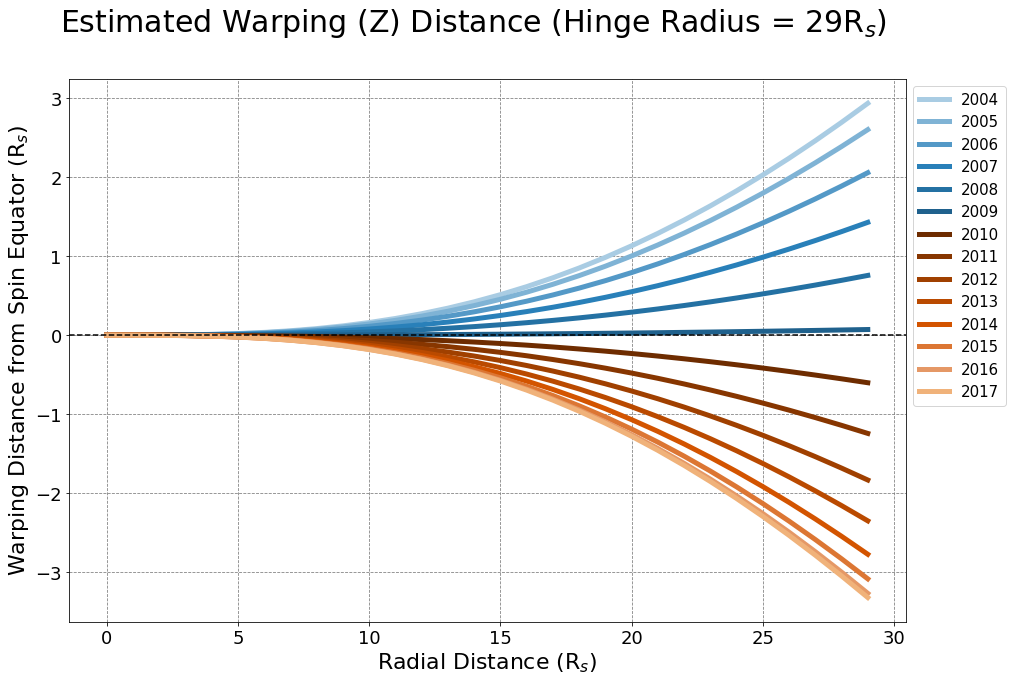

In [249]:
#set up r distance array
rDist = np.arange(0, 30, 1)

#set up parameter for hinge distance. Of note - Arridge found
#best prediction efficency for R of 29 Rs - disucssion in work
#of R = 16 
R = 29

#we use group by again to demonstrate the average yearly values
#by taking the mean value

#set up the "figure size"
fig = plt.figure(figsize=(15, 10))
#make suptitle
fig.suptitle('Estimated Warping (Z) Distance (Hinge Radius = {}'.format(R) + 'R$_{s}$)', fontsize=30)


colors = ['#A9CCE3', '#7FB3D5', '#5499C7', '#2980B9', '#2471A3', '#1F618D', '#6E2C00', 
          '#873600', '#A04000', '#BA4A00', '#D35400', '#DC7633', '#E59866', '#F0B27A']

#set up mini-index for the color iteration
i = 0
for year, solarLatt in currentWarp.groupby(currentWarp.Datetime.dt.year)['SolarLatt']:
    
    #uncomment for printing statements
    #print('Plotting {} and mean solar lattitude {:.1f}'.format(year, solarLatt.mean()))
    
    
    #note - this could be done analytically - however, as most applications will be
    #for data analysis, we are doing the full matrix style to demonstrate
    #how to merge into instrumental observations with timestamps
    
    #make sure to put into radians
    inputAngle = solarLatt.mean() * np.pi / 180.0
    z_vals = np.array([r-R*math.tanh(r/R) for r in rDist])*(math.tan(inputAngle))

  
    #set diff color
    plt.plot(rDist, z_vals, color = colors[i], lw = 5.0, label = '{}'.format(year))
    i = i +1

#place legend outside of plot box, change fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize = 15)
    

#label it
plt.ylabel('Warping Distance from Spin Equator (R$_{s}$)', fontsize = 22)
plt.xlabel('Radial Distance (R$_{s}$)', fontsize = 22)

plt.xticks(fontsize=18) #make the xaxis labels larger
plt.yticks(fontsize=18) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0
plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero


plt.savefig('./Figures/ExpectedWarping.png')

